In [11]:
import sys
from sklearn.ensemble import GradientBoostingClassifier
from mlpath import mlquest as mlq
import numpy as np
sys.path.append('../../')
from DataPreparation.Ingestion import read_data, visualize_data
from DataPreparation.Preprocessing import preprocess_data
from FeatureExtraction.Rand.Rand import apply_rand

In [12]:
mlq.start_quest('Rand-GB')

#### Ingestion

100%|██████████| 4/4 [00:00<00:00, 92.12it/s]


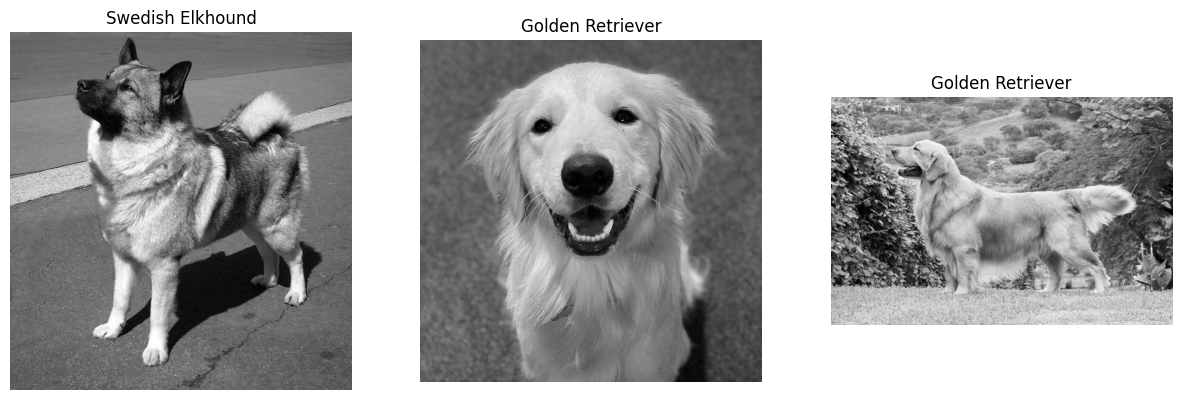

In [13]:
x_train_i, x_val_i, y_train_i, y_val_i = read_data()
visualize_data(x_train_i, y_train_i)

#### Preprocessing

In [14]:
x_train_p, x_val_p = preprocess_data(x_train_i, x_val_i)

#### Feature Extraction: Fractal Features

In [15]:
x_train_f, x_val_f = mlq.l(apply_rand)(x_train_p, x_val_p, num_samples=99)

#### Initiating the Model

In [16]:
model = mlq.l(GradientBoostingClassifier)(n_estimators=99, learning_rate=30, max_depth=6, random_state=0)

#### Training the model

In [17]:
model.fit(x_train_f, y_train_i)

GradientBoostingClassifier(learning_rate=30, max_depth=6, n_estimators=99,
                           random_state=0)

#### Validate the model

In [18]:
accuracy = model.score(x_val_f, y_val_i).item()
mlq.log_metrics(accuracy)

In [19]:
mlq.end_quest('./')

#### Show Logs

In [20]:
mlq.show_logs(quest_name='Rand-GB', last_k=10)